# Dynamic Audification Test

Testing multiple volcano stations with preset configurations


In [1]:
# Import required modules
from python_code.main import main
from python_code.print_manager import print_manager
import os
import ipywidgets as widgets
from IPython.display import display
import timezonefinder
import subprocess
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt


In [2]:
# Configure print options
print_manager.show_times = True          # Time-related messages
print_manager.show_files = True         # File operation messages
print_manager.show_buttons = True        # UI buttons
print_manager.show_marker_summary = True # Marker summaries
print_manager.show_plots = False         # Plot information
print_manager.show_data_info = True      # Data details
print_manager.show_api_requests = True   # API details
print_manager.show_all_markers = False   # All markers detail
print_manager.show_status = True         # Important status messages

print("✅ Print manager configured")


✅ Print manager configured


In [3]:
# Station Presets
STATION_PRESETS = {
    "spurr_seismic": {
        "network": "AV", 
        "station": "SPCN", 
        "channel": "BHZ", 
        "location": "--",
        "name": "Mt. Spurr (Seismic)", 
        "timezone": "America/Anchorage",
        "data_type": "seismic",
        "native_sr": 50  # Hz
    },
    "kilauea_obl_seismic": {
        "network": "HV", 
        "station": "OBL", 
        "channel": "HHZ",  # Change from BHZ to HHZ
        "location": "--",
        "name": "Kīlauea Observatory Bluff (Seismic)", 
        "timezone": "Pacific/Honolulu",
        "data_type": "seismic",
        "native_sr": 100  # Change from 50 to 100 Hz
    },
    "kilauea_uwe_seismic": {
        "network": "HV", 
        "station": "UWE", 
        "channel": "HHZ", 
        "location": "--",
        "name": "Kīlauea Uwekauhane (Seismic)", 
        "timezone": "Pacific/Honolulu",
        "data_type": "seismic",
        "native_sr": 100  # Hz
    },
    "kilauea_uwe_infrasound": {
        "network": "HV", 
        "station": "UWE", 
        "channel": "HDF", 
        "location": "01",
        "name": "Kīlauea Uwekauhane (Infrasound)", 
        "timezone": "Pacific/Honolulu",
        "data_type": "infrasound",
        "native_sr": 100  # Hz
    }
}


🌋 Selected Station: Kīlauea Observatory Bluff (Seismic)
📡 Network.Station.Channel: HV.OBL.HHZ
🕐 Timezone: Pacific/Honolulu
📊 Data Type: seismic
🎵 Native Sampling Rate: 100 Hz

⚡ Audification Analysis:
   Real time: 1 day(s) = 86,400 seconds
   Total samples: 8,640,000 (at 100 Hz)
   Playback time: 115.2 seconds (at 75,000 Hz)
   Speed-up factor: 750x faster

🔧 Configuration:
   days: 1
   sampling_rate: 75000
   tick_interval_hours: 1
   marker_interval_hours: 1
   use_am_pm: True
   markers_timezone: station
   interpolate_missing_data: False
   network: HV
   station: OBL
   channel: HHZ
   station_name: Kīlauea

🚀 Starting audification for Kīlauea Observatory Bluff (Seismic)...

Current UTC time: 2025-10-31 00:22:23
Requesting data from 2025-10-30 00:22:23 to 2025-10-31 00:22:23 UTC
Sending request to IRIS: {'net': 'HV', 'sta': 'OBL', 'loc': '--', 'cha': 'HHZ', 'start': '2025-10-30T00:22:23', 'end': '2025-10-31T00:22:23', 'format': 'miniseed', 'nodata': 404}
✅ Downloaded and saved f

KeyboardInterrupt: 

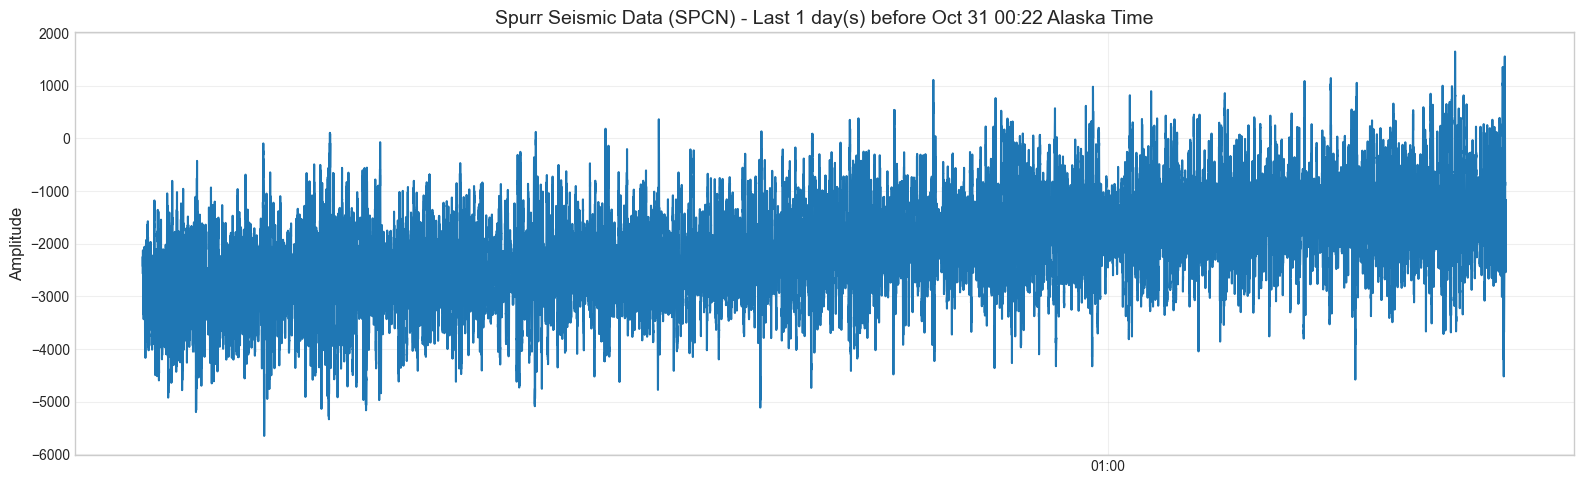

In [4]:
# Select your station preset here - CHANGE THIS TO TEST DIFFERENT STATIONS
selected_preset = "kilauea_obl_seismic"  # Options: spurr_seismic, kilauea_obl_seismic, kilauea_uwe_seismic, kilauea_uwe_infrasound

station_config = STATION_PRESETS[selected_preset]

print(f"🌋 Selected Station: {station_config['name']}")
print(f"📡 Network.Station.Channel: {station_config['network']}.{station_config['station']}.{station_config['channel']}")
print(f"🕐 Timezone: {station_config['timezone']}")
print(f"📊 Data Type: {station_config['data_type']}")
print(f"🎵 Native Sampling Rate: {station_config['native_sr']} Hz")

# Configuration - How much data do you want to process?
days_of_data = 1  # Number of days to process (just like the original!)
audio_sr = 75000  # Hz - our target audio sampling rate

# Calculate speed-up factor for reference
real_time_seconds = days_of_data * 24 * 3600  # Convert days to seconds
native_sr = station_config['native_sr']

# Calculate how many samples we'll have
total_samples = real_time_seconds * native_sr
playback_time_seconds = total_samples / audio_sr
speedup_factor = real_time_seconds / playback_time_seconds

print(f"\n⚡ Audification Analysis:")
print(f"   Real time: {days_of_data} day(s) = {real_time_seconds:,} seconds")
print(f"   Total samples: {total_samples:,} (at {native_sr} Hz)")
print(f"   Playback time: {playback_time_seconds:.1f} seconds (at {audio_sr:,} Hz)")
print(f"   Speed-up factor: {speedup_factor:.0f}x faster")

# Configuration parameters (for future use when main() accepts station params)
config = {
    "days": days_of_data,  # Number of days to process
    "sampling_rate": audio_sr,
    "tick_interval_hours": 1,
    "marker_interval_hours": 1,
    "use_am_pm": True,
    "markers_timezone": "station",  # Options: "station", "UTC", "America/Anchorage", "Pacific/Honolulu", "America/New_York"
    "interpolate_missing_data": False,
    "network": station_config["network"],
    "station": station_config["station"], 
    "channel": station_config["channel"],
    "station_name": station_config["name"].split()[0]
}

print(f"\n🔧 Configuration:")
for key, value in config.items():
    print(f"   {key}: {value}")
    
    
# Run the audification
print(f"\n🚀 Starting audification for {station_config['name']}...\n")

try:
    result = main(**config)
    
    if result and result.get('success'):
        print(f"\n✅ Audification completed successfully!")
        print(f"📁 Files created:")
        print(f"   Audio: {result['audio_file']}")
        print(f"   Plot: {result['plot_file']}")
        print(f"   Markers: {result['marker_file']}")
        print(f"   Data: {result['mseed_file']}")
    else:
        print(f"❌ Audification failed")
        
except Exception as e:
    print(f"❌ Error during audification: {e}")
    result = None



## Notes

### To test different stations:
1. Change the `selected_preset` variable in the second cell
2. Re-run all cells

### Available presets:
- `spurr_seismic` - Mt. Spurr seismic data (50 Hz)
- `kilauea_obl_seismic` - Kilauea Observatory Bluff seismic (50 Hz estimated)  
- `kilauea_uwe_seismic` - Kilauea Uwekauhane seismic (100 Hz)
- `kilauea_uwe_infrasound` - Kilauea Uwekauhane infrasound (100 Hz)

### Current Limitation:
The `main()` function currently has hardcoded Mt. Spurr parameters. To test other stations, we need to modify it to accept network/station/channel parameters.

### Speed-up Analysis:
- **Mt. Spurr (50 Hz)**: 1 day → 57.6 seconds (1,500x speedup)
- **Kilauea HHZ (100 Hz)**: 1 day → 115.2 seconds (750x speedup) 
- **Kilauea HDF Infrasound (100 Hz)**: 1 day → 115.2 seconds (750x speedup)

Different native sampling rates result in different playback speeds when using the same audio sampling rate!
